# Youyou Xie Homework1

## Problem 1 Regularization

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

In [14]:
#########read the data
hitters = pd.read_csv("Hitters.csv",sep = ",")

In [15]:
###drop NaN and Name Column
hit = hitters.dropna().drop(['Unnamed: 0','League','Division','NewLeague'],axis = 1)
y = hit['Salary']
hit = hit.drop(['Salary'],axis = 1)
x = hit.astype('float64')
x_labels = hit.columns
hit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 16 columns):
AtBat      263 non-null int64
Hits       263 non-null int64
HmRun      263 non-null int64
Runs       263 non-null int64
RBI        263 non-null int64
Walks      263 non-null int64
Years      263 non-null int64
CAtBat     263 non-null int64
CHits      263 non-null int64
CHmRun     263 non-null int64
CRuns      263 non-null int64
CRBI       263 non-null int64
CWalks     263 non-null int64
PutOuts    263 non-null int64
Assists    263 non-null int64
Errors     263 non-null int64
dtypes: int64(16)
memory usage: 34.9 KB


In [16]:
#############Cross Validation
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 123)

In [17]:
##########define a function to plot
def fig_plot(CLF,X,Y,alphas,title,labels):
    coefs = []
    for alpha in alphas:
        CLF.set_params(alpha=alpha)
        CLF.fit(x_train, y_train)
        coefs.append(CLF.coef_)
        
    plt.figure(figsize=(13,6))
    ax = plt.gca()
    ax.plot(alphas*2, coefs)
    ax.set_xscale('log')
    plt.axis('tight')
    plt.legend(labels)
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title('Visualization of the coefficient trajectories with Lasso')
    plt.show()

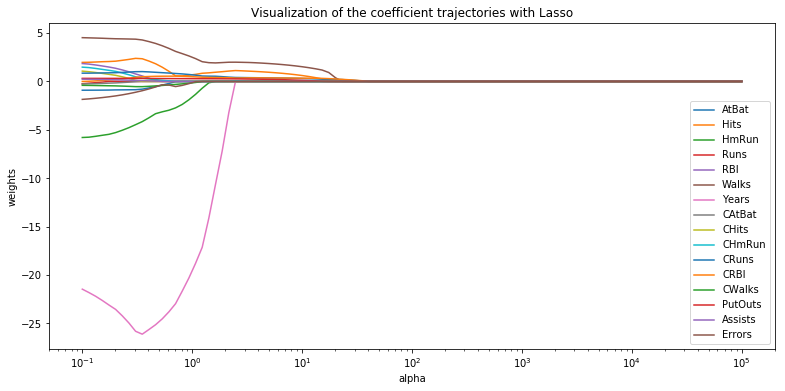

In [18]:
#lasso
alphas = 10**np.linspace(5,-1,100)*0.5
title1 = 'Visualization of the coefficient trajectories with Lasso'
lasso = Lasso(max_iter = 10000,normalize = True)
fig_plot(lasso,x_train,y_train,alphas,title1,x_labels)

In [19]:
#find the three predictors remain in the lasso model
lasso_coefs = []
for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(x_train, y_train)
    lasso_coefs.append(lasso.coef_)
for coe in lasso_coefs:
    if (coe==0).sum()==13:
        print(pd.Series(coe,index = x.columns))
print("The three predictors remain in the lasso model is Walks,CRuns,CRBI")

AtBat      0.000000
Hits       0.000000
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.385667
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.214914
CRBI       0.254670
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64
The three predictors remain in the lasso model is Walks,CRuns,CRBI


In [20]:
###use the cross-validation to find the optimal value of the regularization penalty
lasso_cv = LassoCV(alphas =None, cv = 10, max_iter = 10000, normalize = True)
lasso_cv.fit(x_train,y_train)
lasso.set_params(alpha = lasso_cv.alpha_)
lasso_mse = mean_squared_error(y_test,lasso.predict(x_test))
print('\nThe optimal value of the regularization penalty is', lasso_cv.alpha_)
print('\nLasso MSE with best alpha is')
print(lasso_mse)
####how many predictors are left in that model?
print(pd.Series(lasso_cv.coef_, index=x.columns).sort_values())
print("\nThere are 11 predictors are left in the model")


The optimal value of the regularization penalty is 0.28382241276885584

Lasso MSE with best alpha is
146659.69569474543
Years     -24.231459
HmRun      -3.098501
CWalks     -0.392426
AtBat      -0.302836
Errors     -0.289055
Runs       -0.000000
RBI         0.000000
CAtBat     -0.000000
CHits       0.000000
Assists     0.000000
CHmRun      0.094834
PutOuts     0.296818
CRBI        0.543119
CRuns       0.887245
Hits        1.287337
Walks       3.569116
dtype: float64

There are 11 predictors are left in the model


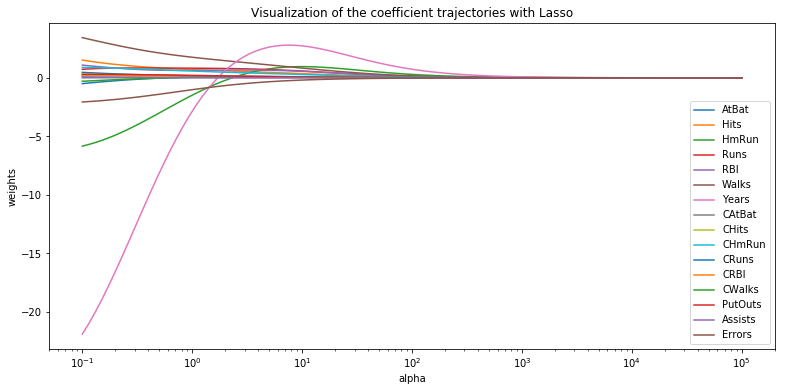

In [21]:
#Ridge Regression
alphas = 10**np.linspace(5,-1,100)*0.5
title2 = 'Visualization of the coefficient trajectories with Ridge'
ridge = Ridge(max_iter = 10000,normalize = True)
fig_plot(ridge,x_train,y_train,alphas,title2,x_labels)

In [22]:
#use the cross-validation to find the optimal value of the regularization penalty
ridge_cv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error',normalize = True)
ridge_cv.fit(x_train,y_train)
ridge.set_params(alpha = ridge_cv.alpha_)
print('The optimal value of the regualrization pernalty is',ridge_cv.alpha_)

The optimal value of the regualrization pernalty is 0.05


## Problem 2

In [23]:
alphas = 10**np.linspace(5,-1,10)*0.5
trainr=[]
testr=[]
for x in alphas:
    ridge2 = Ridge(alpha = x, normalize = True)
    ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
    pred1 = ridge2.predict(x_train)
    pred2 = ridge2.predict(x_test)          
    # Calculate the train RMSE
    rmse1 = (mean_squared_error(y_train, pred1))**0.5 
    # Calculate the test RMSE
    rmse2 = (mean_squared_error(y_test, pred2))**0.5       # Calculate the test RMSE
    trainr.append(rmse1)
    testr.append(rmse2)
dfr = pd.DataFrame(list(zip(alphas, trainr, testr)), 
               columns =['ridge_alpha', 'train_mse', 'lasso_mse']) 
dfr 

,ridge_alpha,train_mse,lasso_mse
0,50000.000000,463.070732,395.661297
1,10772.173450,462.956459,395.557819
2,2320.794417,462.428163,395.079775
3,500.000000,460.020736,392.908656
4,107.721735,449.738470,383.780567
5,23.207944,415.964741,355.982713
6,5.000000,364.356847,327.257060
7,1.077217,338.455640,335.300407
8,0.232079,325.894328,352.711484
9,0.050000,316.285123,364.684009


In [24]:
trainl=[]
testl=[]
for x in alphas:
    lasso2 = Lasso(alpha = x, normalize = True)
    lasso2.fit(x_train, y_train)             # Fit a ridge regression on the training data
    pred1 = lasso2.predict(x_train)
    pred2 = lasso2.predict(x_test)          
    # Calculate the train RMSE
    rmse1 = (mean_squared_error(y_train, pred1))**0.5 
    # Calculate the test RMSE
    rmse2 = (mean_squared_error(y_test, pred2))**0.5       # Calculate the test RMSE
    trainl.append(rmse1)
    testl.append(rmse2)
dfl = pd.DataFrame(list(zip(alphas, trainl, testl)), 
               columns =['lasso_alpha', 'train_mse', 'lasso_mse']) 
print(dfl) 
print("As alpha becomes larger, the bias becomes larger and the variance becomes smaller.")

    lasso_alpha   train_mse   lasso_mse
0  50000.000000  463.102140  395.689742
1  10772.173450  463.102140  395.689742
2   2320.794417  463.102140  395.689742
3    500.000000  463.102140  395.689742
4    107.721735  463.102140  395.689742
5     23.207944  463.102140  395.689742
6      5.000000  345.242936  347.311070
7      1.077217  328.369368  353.493943
8      0.232079  314.768405  370.042853
9      0.050000  307.775874  382.716421
As alpha becomes larger, the bias becomes larger and the variance becomes smaller.


2.1 Explain in your own words the bias-variance tradeoff  
Bias is the difference between the average prediction on the training dataset and the actual value. Model with high bias pays very little attention to the training dataset and oversimplifiers the model.  
Variance is the variability of the estimate the test data using the training dataset. High variance models pays too much attention to the noise data in the training dataset so it performs very well on the training data but have high error on the test data. 

2.2 What role does regularization play in this tradeoff.  
Sometimes, there are too many explanatory variables in hte models and some variables may be useless and will likely lead to overfitting problem. Regularization can help reduce number of variables in the model. Thus it will reduce variance of the model and at the same time increase bias.

2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance  
Both ridge and lasso models use the penalty parameters to regularize the size of features. While $\alpha$ becomes larger, the model include less variables, which makes the model more biased and less variance. Lasso regulaize the features by minimizing the absolute sum of residuals. Coefficients will be reduced to zero when penalty parameter increases. And for ridge, coefficients will be reduced when parameter increaes. Thus increasing penalty parameter will lead to higher bias and lower variance. Therefore, researchers must find a tradeoff between bias and variance for a suitable prediction model.